# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [8]:
import math
N = 10000
d = 10
ads_selection = []
number_of_selection = [0]*d
sum_of_reward = [0]*d
total_reward = 0
for n in range(0,N):
  ad=0
  max_upper_bound=0
  for i in range(0,d):
    if number_of_selection[i] > 0:
      average_reward = sum_of_reward[i]/number_of_selection[i]
      delta_i = math.sqrt((3/2)*(math.log(n)/number_of_selection[i]))
      upper_bound = average_reward+delta_i
    else:
      upper_bound= 1e400
    if max_upper_bound < upper_bound:
      max_upper_bound = upper_bound
      ad=i
  ads_selection.append(ad)
  number_of_selection[ad]+=1
  reward = dataset.values[n,ad]
  sum_of_reward[ad]+=reward
  total_reward+=reward

## Visualising the results

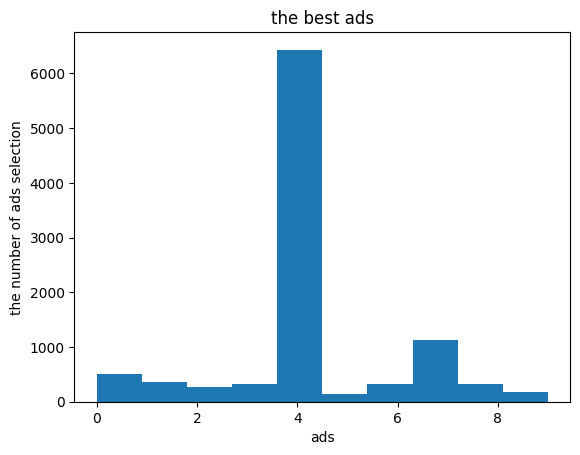

In [9]:
plt.hist(ads_selection)
plt.xlabel('ads')
plt.ylabel("the number of ads selection")
plt.title('the best ads')
plt.show()